# WELCOME!


# IMAGE RECOGNITION WITH TENSORFLOW

BSYS 4205

ITMG 4A


Group:
- Anamika Datta
- Hiroko Ono
- Luciana Akemi Kato de Souza
- Phoebe Chong
- Vaishnavi Nandurkar

Find this video, notebook and our references in GitHub: https://github.com/HIROKO-BCIT/BSYS4205_Image_Recognition

# INTRODUCTION

### Case Objective
Providing a basic overview on what Deep Learning is, for someone that has minimal knowledge on this subject. 
We will achieve this by walking you through the process of training a neural network model on the classification of various fashion images including clothing and shoes. 

### What is Deep Learning?
Deep learning is part of a broader family of machine learning methods based on artificial neural networks. Basically it is an artificial intelligence (AI) function that imitates the workings of the human brain in processing data and creating patterns for use in decision making.

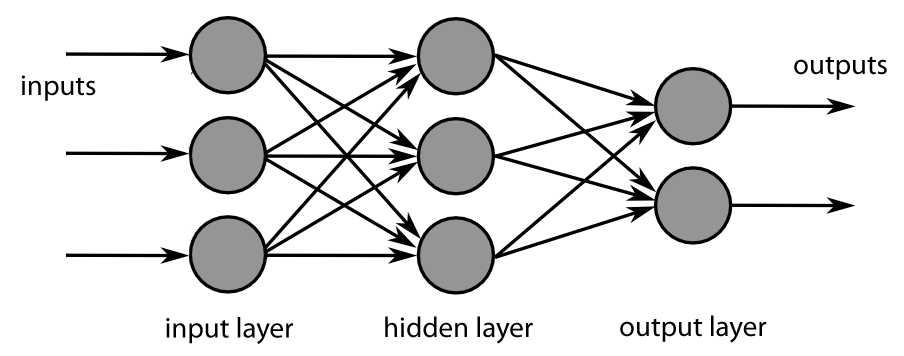

### What is convolutional network?
The CNN works by extracting features directly from images. The relevant features are not pretrained; they are learned while the network trains on a collection of images. 

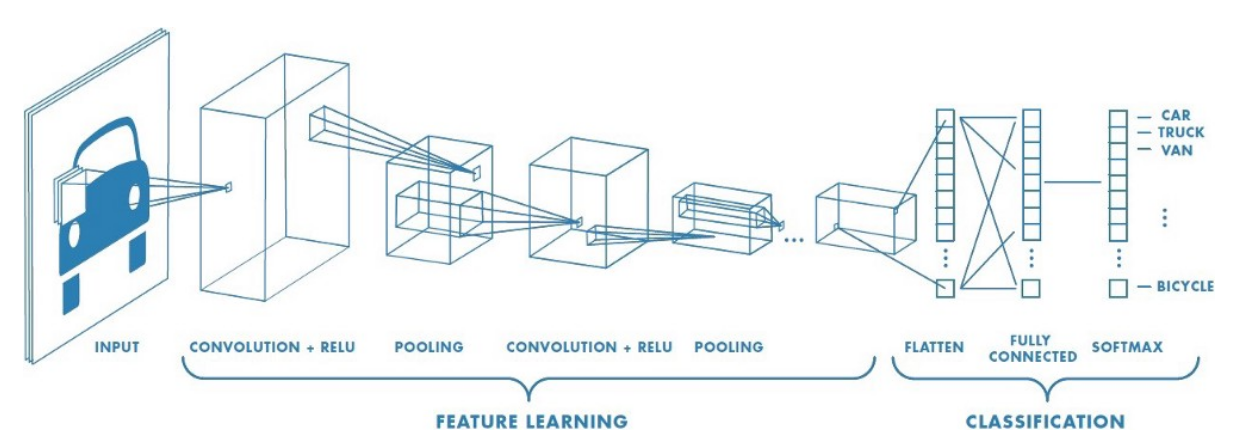

### What is TensorFlow?
TensorFlow is an open source library created for Python by the Google Brain team. 

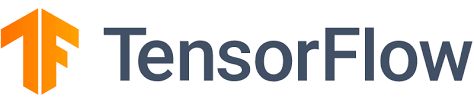

### Our steps
This notebook will explain in detail and each of the five steps to build an image recognition algorithm using Tensor Flow  

1. Import libraries and dataset
2. Preprocess the image dataset
3. Build the deep learning model and set the hyperparameters
4. Train, test, and improve the algorithm
5. Make predictions using the algorithm


# STEP 1 - Import Libraries & Dataset 
The Fashion MINST dataset with 60,000 images and is used to train a neural network model to sort 10 types of fashion items. It can be acessed straight from tensor flow.

Snapshot of the images:
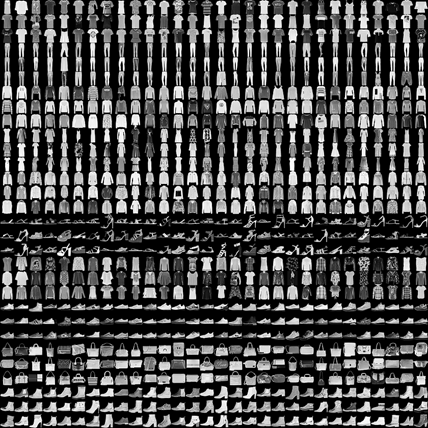

Labels:
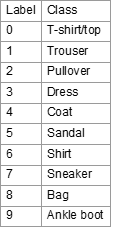

In [17]:
# TensorFlow and tf.keras:
import tensorflow as tf

# Helper libraries:
import numpy as np
import matplotlib.pyplot as plt

# Import Fashion Mnist:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Storing the names for the labels:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# STEP 2 - Preprocess the Data
The pixel values have to be put on a scale from 0 to 1 so it can be processed by the neural network model. To do this, both the training set and test set must be divided by 255.

Example of images in the dataset:
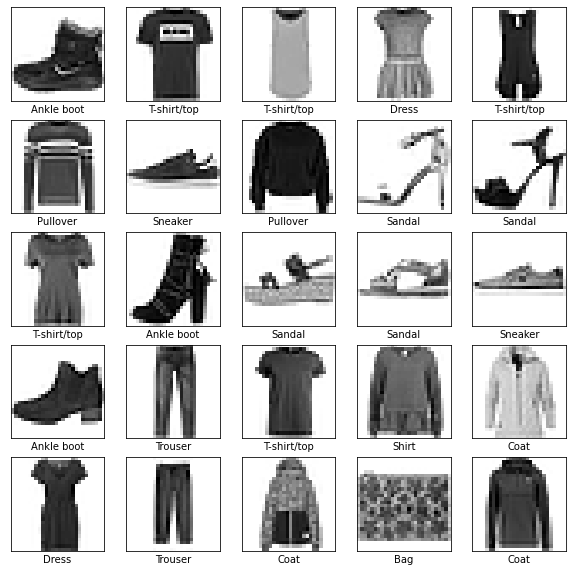

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# STEP 3 - Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### 3.1 Configuring the layers
Three layers:
- Flatten
- Dense (128 neurons)
- Dense (10 neurons)

Examples of activation functions:
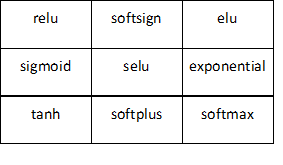

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### 3.2 Compiling the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# STEP 4 - Train & test the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

### 4.1 Feed the data
‘Model.fit’ is utilized for training the model using the provided inputs and training labels.

In [21]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.4968 - accuracy: 0.8232
Epoch 2/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3723 - accuracy: 0.8653
Epoch 3/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3347 - accuracy: 0.8782
Epoch 4/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3131 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2937 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2789 - accuracy: 0.8968
Epoch 7/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2684 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2530 - accuracy: 0.9063
Epoch 9/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2464 - accuracy: 0.9081
Epo

### 4.2 Evaluate test accuracy
The next step is to now evaluate the accuracy of the model on the test data. We use the ‘model.evaluate’ function.

In [22]:
# Evaluate accuracy

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3335 - accuracy: 0.8856

Test accuracy: 0.8856


### 4.3 Optimization Scenarios
We created several scenarios by experimenting with five different hyperparameters:

Model hyperparameters
1. Number of hidden layers
2. Number of neurons in each layer
3. Activation type (“mathematical “gate” in between the input feeding the current neuron and its output going to the next layer)

Algorithm hyperparameters

4. Optimizer type (methods used to change the attributes of the neural network such as weights and learning rate in order to reduce the losses)
5. Number of epochs (number times that the learning algorithm will work through the entire training dataset)

The table below summarizes the resulting accuracy rate and the loss:
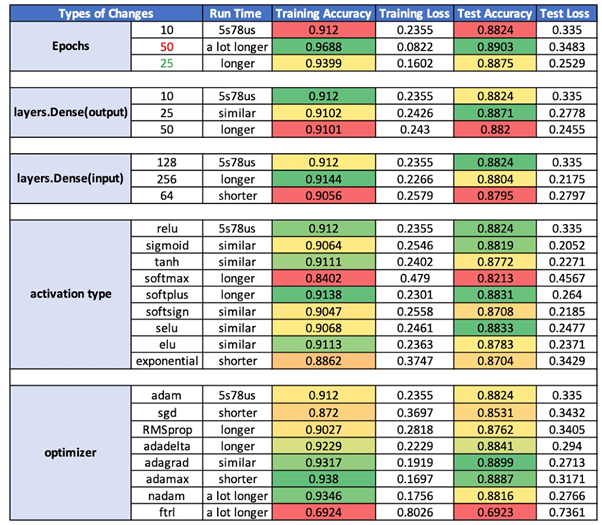

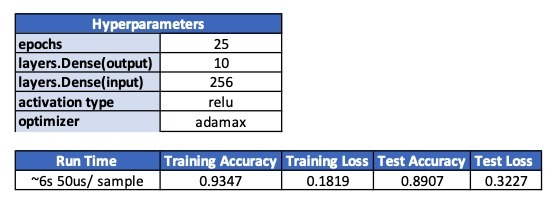

# STEP 5 - Make predictions

### 5.1 Run data through the algorithm

Example of vector resulting from using a Softmax layer:
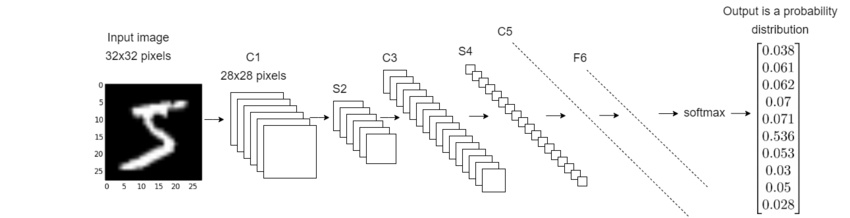

In [23]:
# Transform logit results into vectors with a softmax layer:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Store results array in a variable:
predictions = probability_model.predict(test_images)

### 5.2 Graph the image and its classification

Example of the results display:
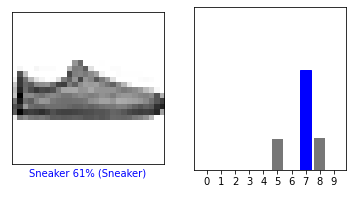

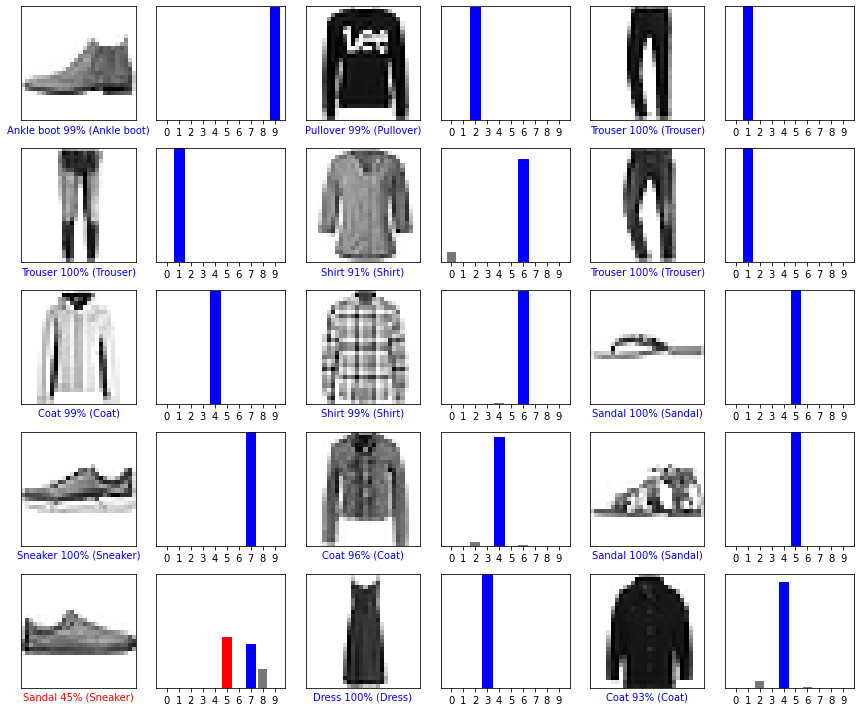

In [24]:
def plot_image(i, predictions_array, true_label, img):

# Show image:
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

# Label colors:
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

# Predicted label vs true label AND total percentage:
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Bar chart with colors:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first 15 test images:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()